In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, log_loss
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

print(device)

cuda


In [3]:
df_normal_train = pd.read_csv("normalTrafficTraining.csv")
df_normal_test = pd.read_csv("normalTrafficTest.csv")
df_anomal_test = pd.read_csv("anomalousTrafficTest.csv")


print(df_normal_train.shape)
print(df_normal_test.shape)
print(df_anomal_test.shape)

(36000, 14)
(36000, 14)
(24668, 14)


In [16]:
# Datasets

df_normal = pd.concat([df_normal_train, df_normal_test])
df_normal['label'] = 0

df_anomal_test['label'] = 1

df = pd.concat([df_normal, df_anomal_test])

df['Content_present'] = df['ContentLen'].notnull().astype(int)

features = ['Method', 'ReqLen', 'ArgLen', 'NumArgs', 'NumDigitsArgs', 
            'PathLen', 'NumLettersArgs', 'NumLettersPath', 'NumSpecialCharsPath', 
            'MaxByteValReq', 'Content_present']
X = df[features]
y = df['label']

# print(X.head())

# Convert to categorical boolean features if necessary
# X = pd.get_dummies(X, columns=['Method'], drop_first=True)
# print(X.head())

print(X.head())

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

   Method  ReqLen  ArgLen  NumArgs  NumDigitsArgs  PathLen  NumLettersArgs  \
0       0      39       0        0              0       39               0   
1       0     116      35        5              7       48              24   
2       1     116      35        5              7       48              24   
3       0     115      32        5              3       52              28   
4       1     115      32        5              3       52              28   

   NumLettersPath  NumSpecialCharsPath  MaxByteValReq  Content_present  
0              27                    7            120                0  
1              35                    8            117                0  
2              35                    8            117                1  
3              39                    8            119                0  
4              39                    8            119                1  


## Random Forest

In [32]:
rf_clf = RandomForestClassifier(random_state=42)
# xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

rf_clf.fit(X_train, y_train)
# xgb_clf.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_val, y_val)], early_stopping_rounds=10, verbose=False)

RandomForestClassifier(random_state=42)

Random Forest Metrics: {'Precision': 0.9261379902662468, 'Recall': 0.8740880843015402, 'F1 Score': 0.8993605782596609, 'Accuracy': 0.9500724087993931}


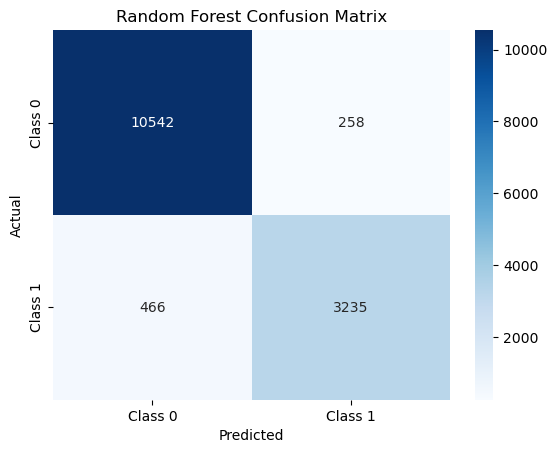

In [33]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
rf_metrics = {
    'Precision': precision_score(y_test, y_pred_rf),
    'Recall': recall_score(y_test, y_pred_rf),
    'F1 Score': f1_score(y_test, y_pred_rf),
    'Accuracy': accuracy_score(y_test, y_pred_rf)
}
print("Random Forest Metrics:", rf_metrics)

cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues", xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest Confusion Matrix")
plt.show()

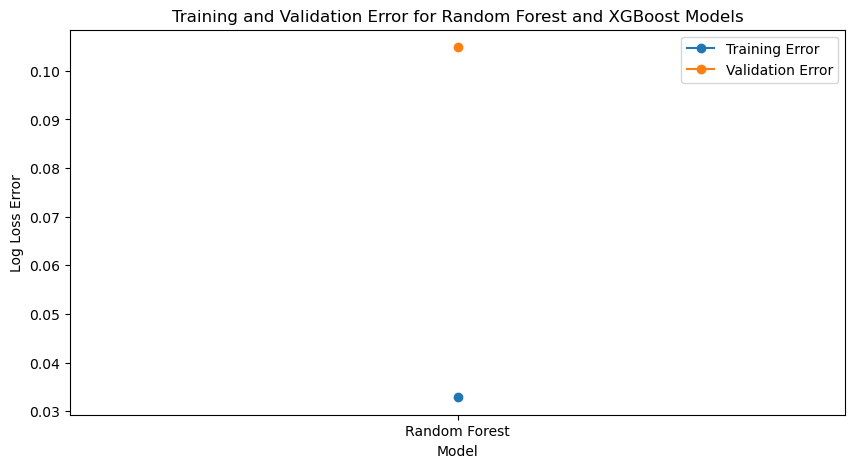

In [23]:
y_train_pred_rf = rf_clf.predict_proba(X_train)
y_val_pred_rf = rf_clf.predict_proba(X_val)
train_error_rf = log_loss(y_train, y_train_pred_rf)
val_error_rf = log_loss(y_val, y_val_pred_rf)

# y_train_pred_xgb = xgb_clf.predict_proba(X_train)
# y_val_pred_xgb = xgb_clf.predict_proba(X_val)
# train_error_xgb = log_loss(y_train, y_train_pred_xgb)
# val_error_xgb = log_loss(y_val, y_val_pred_xgb)

# plt.figure(figsize=(10, 5))
# plt.plot(['Random Forest', 'XGBoost'], [train_error_rf, train_error_xgb], marker='o', label='Training Error')
# plt.plot(['Random Forest', 'XGBoost'], [val_error_rf, val_error_xgb], marker='o', label='Validation Error')

# plt.plot(['Random Forest'], [train_error_rf], marker='o', label='Training Error')
# plt.plot(['Random Forest'], [val_error_rf], marker='o', label='Validation Error')
# plt.xlabel("Model")
# plt.ylabel("Log Loss Error")
# plt.title("Training and Validation Error for Random Forest and XGBoost Models")
# plt.legend()
# plt.show()

In [24]:
train_accuracy_rf = accuracy_score(y_train, rf_clf.predict(X_train))
print("Training Accuracy (Random Forest):", train_accuracy_rf)


Training Accuracy (Random Forest): 0.9929655518938331


In [25]:
test_accuracy_rf = accuracy_score(y_test, rf_clf.predict(X_test))
print("Test Accuracy (Random Forest):", test_accuracy_rf)

Test Accuracy (Random Forest): 0.9502103303220467


## SVM

In [34]:
svm_model = SVC(kernel='linear', probability=True, random_state=42)
svm_model.fit(X_train, y_train)

y_pred_svm = svm_model.predict(X_test)
svm_metrics = {
    'Precision': precision_score(y_test, y_pred_svm),
    'Recall': recall_score(y_test, y_pred_svm),
    'F1 Score': f1_score(y_test, y_pred_svm),
    'Accuracy': accuracy_score(y_test, y_pred_svm)
}
print("SVM Metrics:", svm_metrics)

cm_svm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Blues", xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("SVM Confusion Matrix")
plt.show()

## Neural Network

In [17]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)
X_val_tensor = torch.tensor(X_val.values, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val.values, dtype=torch.long)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)

train_loader = DataLoader(TensorDataset(X_train_tensor, y_train_tensor), batch_size=32, shuffle=True)
val_loader = DataLoader(TensorDataset(X_val_tensor, y_val_tensor), batch_size=32)
test_loader = DataLoader(TensorDataset(X_test_tensor, y_test_tensor), batch_size=32)

In [18]:
class DNNClassifier(nn.Module):
    def __init__(self, input_size):
        super(DNNClassifier, self).__init__()
        self.network = nn.Sequential(
            nn.Linear(input_size, 128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 2)
        )

    def forward(self, x):
        return self.network(x)

input_size = X_train.shape[1]
model = DNNClassifier(input_size).to(device)


epoch = 0
epoch = 1
epoch = 2
epoch = 3
epoch = 4
epoch = 5
epoch = 6
epoch = 7
epoch = 8
epoch = 9
epoch = 10
epoch = 11
epoch = 12
epoch = 13
epoch = 14
epoch = 15
epoch = 16
epoch = 17
epoch = 18
epoch = 19
epoch = 20
epoch = 21
epoch = 22
epoch = 23
epoch = 24
epoch = 25
epoch = 26
epoch = 27
epoch = 28
epoch = 29
epoch = 30
epoch = 31
epoch = 32
epoch = 33
epoch = 34


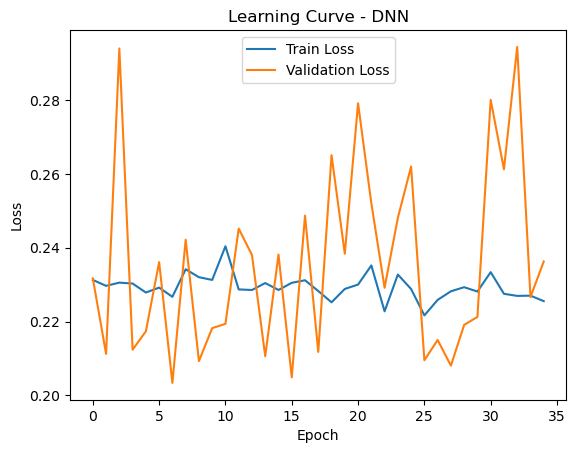

In [31]:
num_epochs = 35
learning_rate = 0.0001

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

train_loss = []
val_loss = []

for epoch in range(num_epochs):
    print("epoch =", epoch)
    
    model.train()
    epoch_loss = 0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        epoch_loss += loss.item()
    
    train_loss.append(epoch_loss / len(train_loader))

    model.eval()
    val_epoch_loss = 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            val_epoch_loss += criterion(outputs, labels).item()
    val_loss.append(val_epoch_loss / len(val_loader))

plt.plot(train_loss, label='Train Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title("Learning Curve - DNN")
plt.show()


In [32]:
model.eval()
y_pred = []
y_true = []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs = inputs.to(device)
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        y_pred.extend(preds.cpu().numpy())
        y_true.extend(labels.numpy())

dnn_metrics = {
    'Precision': precision_score(y_true, y_pred),
    'Recall': recall_score(y_true, y_pred),
    'F1 Score': f1_score(y_true, y_pred),
    'Accuracy': accuracy_score(y_true, y_pred)
}
print("DNN Metrics:", dnn_metrics)


DNN Metrics: {'Precision': 0.997341603898981, 'Recall': 0.6082139962172386, 'F1 Score': 0.7556226921785835, 'Accuracy': 0.8995931315081719}


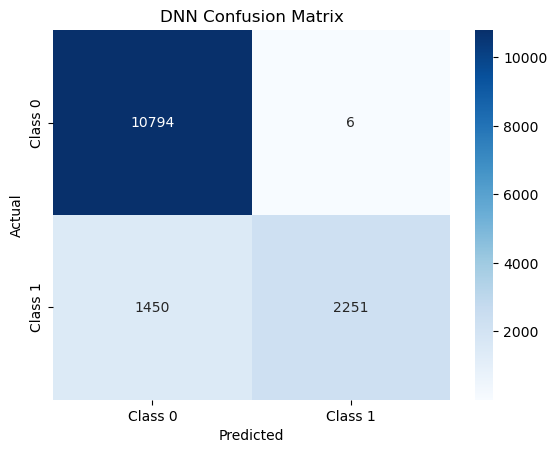

Total Misclassified Samples: 1456


In [33]:
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("DNN Confusion Matrix")
plt.show()

misclassified = [(pred, true) for pred, true in zip(y_pred, y_true) if pred != true]
print(f"Total Misclassified Samples: {len(misclassified)}")